# Part 2. Exploratory Data Analysis

## Import libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from importlib import reload
import numpy as np

## Load data


In [3]:
bit_data=pd.read_csv('bit_data.csv',header=0, parse_dates=[0])

In [16]:
bit_data.tail()

,Date,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Return,Change,Volatility,MA7,MA21,Momentum,MACD,Signal,Upper_band,Lower_band
2837,2021-02-23 23:59:59,Bitcoin,BTC,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11,-0.099,-5382.892196,10331.599596,53769.735433,47289.415827,56096.520513,4566.049082,4517.102742,59826.554174,34752.277479
2838,2021-02-24 23:59:59,Bitcoin,BTC,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11,0.018,880.906447,10213.074752,53420.639116,47871.951218,57536.943668,4126.268801,4438.935954,59604.211576,36139.690859
2839,2021-02-25 23:59:59,Bitcoin,BTC,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11,-0.053,-2611.480297,10021.835803,52765.504305,48356.131625,54204.319065,3526.365381,4256.421839,58977.804013,37734.459237
2840,2021-02-26 23:59:59,Bitcoin,BTC,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11,-0.018,-754.092936,9818.755354,51401.450933,48746.391302,48821.426869,2956.013517,3996.340175,58345.200144,39147.582461
2841,2021-02-27 23:59:59,Bitcoin,BTC,48253.270101,45269.025766,46344.772237,46188.451275,4.591095e+10,8.609781e+11,-0.003,-151.308808,9616.167645,49985.583899,49076.031328,49702.333316,2463.399661,3689.752072,57737.084195,40414.978460


## Check for Correlation

In [6]:
bit_data.corr()[['Return']].sort_values(by='Return', ascending=False)[:5]

,Return
Return,1.000000
Change,0.564951
MACD,0.051901
Close,0.039800
Marketcap,0.039260


Return correlated with Change: 56%

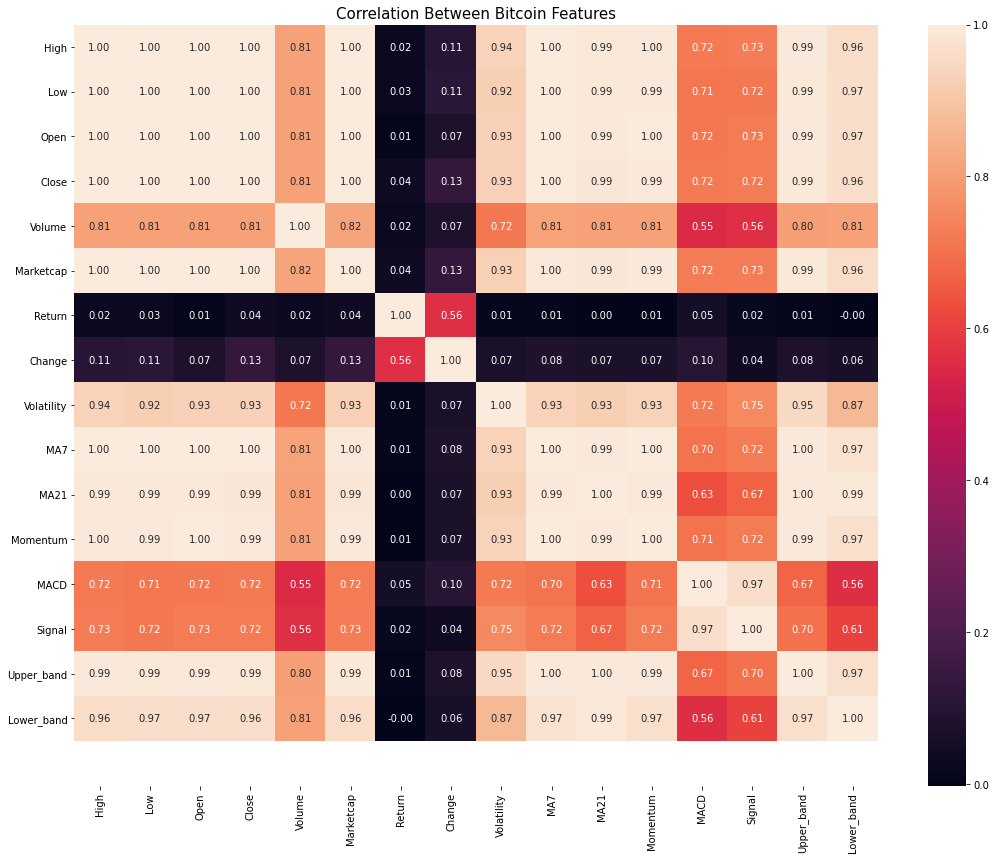

In [7]:
plt.figure(figsize=(18,14))
sns.heatmap(bit_data.corr(), annot=True, fmt='.2f')
plt.ylim(17, 0)
plt.title('Correlation Between Bitcoin Features', fontSize=15)
plt.show()

## Bollinger Bands, MACD, Volume


In [8]:
def bollinger_bands(stock, std=2):    
    
    # Bollinger band plot with EMA and original historical data
    plt.figure(figsize=(16,5))
    plt.style.use('seaborn-whitegrid')
    plt.plot(stock.index, stock.Close, color='#3388cf', label='Price')
    plt.plot(stock.index, stock.MA21, color='#ad6eff', label='Moving Average (21 days)')
    #plt.plot(stock.index, stock.MA7, color='#ff6e9d', label='Moving Average (7 days)')
    plt.plot(stock.index, stock.Upper_band, color='#ffbd74', alpha=0.3)
    plt.plot(stock.index, stock.Lower_band, color='#ffa33f', alpha=0.3)
    plt.fill_between(stock.index, stock.Upper_band, stock.Lower_band, color='#ffa33f', alpha=0.1, label='Bollinger Band ({} STD)'.format(std))
    plt.legend(frameon=True, loc=1, ncol=1, fontsize=10, borderpad=.6)
    plt.title('Bollinger Bands', fontSize=15)
    plt.ylabel('Price', fontSize=12)
    plt.xlim([stock.index.min(), stock.index.max()])
    plt.show()

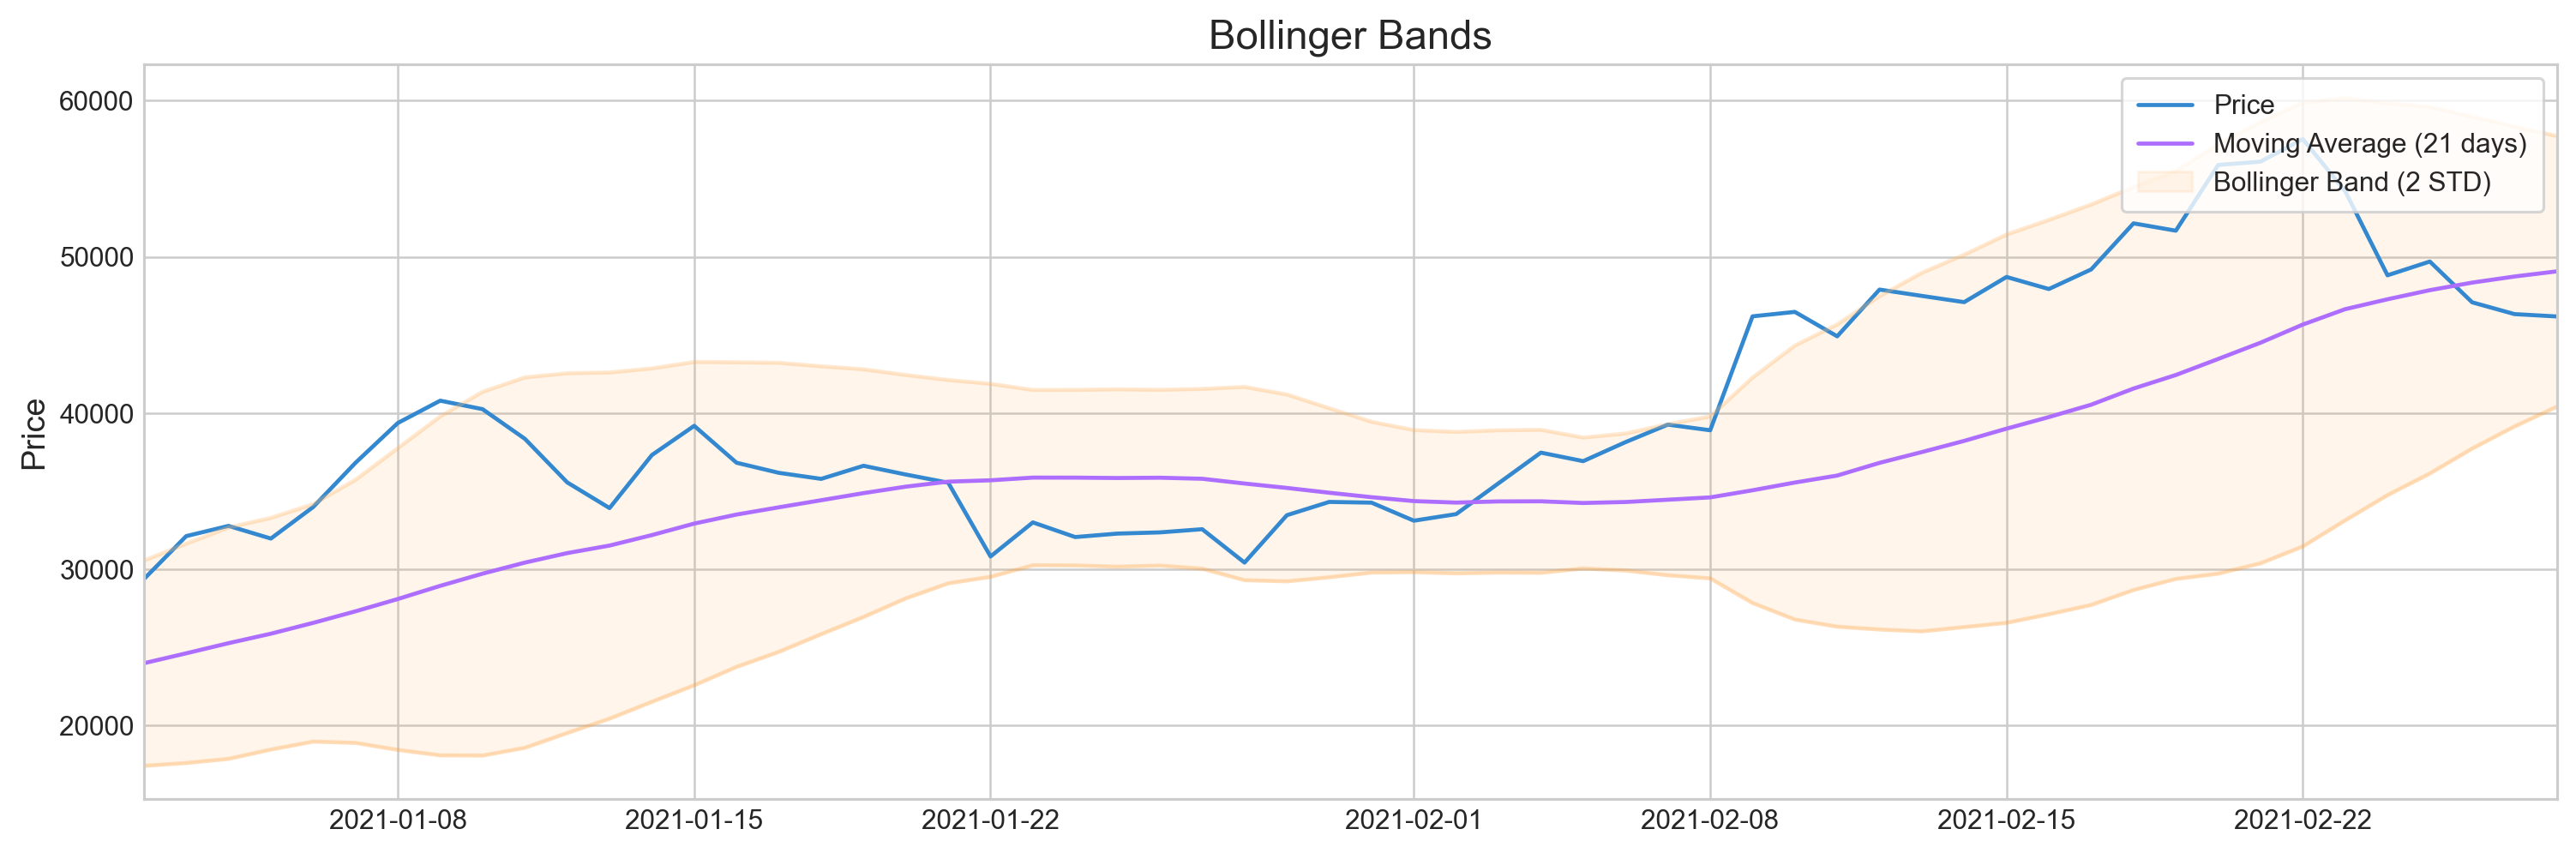

In [45]:
bollinger_bands(bit_data.loc['2021-01':'2021-02'])

In [23]:
bit_data['Date'] = pd.to_datetime(bit_data['Date'])
bit_data.set_index('Date', inplace=True)

In [24]:
bit_data.head()

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Return,Change,Volatility,MA7,MA21,Momentum,MACD,Signal,Upper_band,Lower_band
Date,,,,,,,,,,,,,,,,,,
2013-05-19 23:59:59,Bitcoin,BTC,124.500000,119.570999,123.210999,121.989998,0.0,1.363205e+09,-0.010,-1.508003,8.471155,118.709001,117.159143,115.760002,-3.645462,-5.658709,137.200466,97.117819
2013-05-20 23:59:59,Bitcoin,BTC,123.621002,120.120003,122.500000,122.000000,0.0,1.363710e+09,-0.004,0.010002,8.256357,119.283286,116.085810,120.014999,-3.142245,-5.155416,131.946473,100.225146
2013-05-21 23:59:59,Bitcoin,BTC,123.000000,121.209999,122.019997,122.879997,0.0,1.374013e+09,0.007,0.879997,8.080808,120.909000,115.318190,120.498001,-2.641979,-4.652728,127.699871,102.936510
2013-05-22 23:59:59,Bitcoin,BTC,124.000999,122.000000,122.889999,123.889000,0.0,1.385779e+09,0.008,1.009003,7.948854,122.290285,115.646714,118.989998,-2.139434,-4.150069,128.569000,102.724428
2013-05-23 23:59:59,Bitcoin,BTC,126.933998,123.099998,123.800003,126.699997,0.0,1.417770e+09,0.023,2.810997,7.969404,123.424570,116.670048,119.000000,-1.497082,-3.619472,129.524510,103.815585


In [26]:
def volume(stock):
    # Volume plot
    plt.figure(figsize=(16,2))
    plt.style.use('seaborn-whitegrid')
    plt.title('Volume', fontSize=15)
    plt.ylabel('Volume', fontSize=12)
    plt.plot(stock.index, stock['Volume'].ewm(21).mean())
    plt.xlim([stock.index.min(), stock.index.max()])
    plt.show()

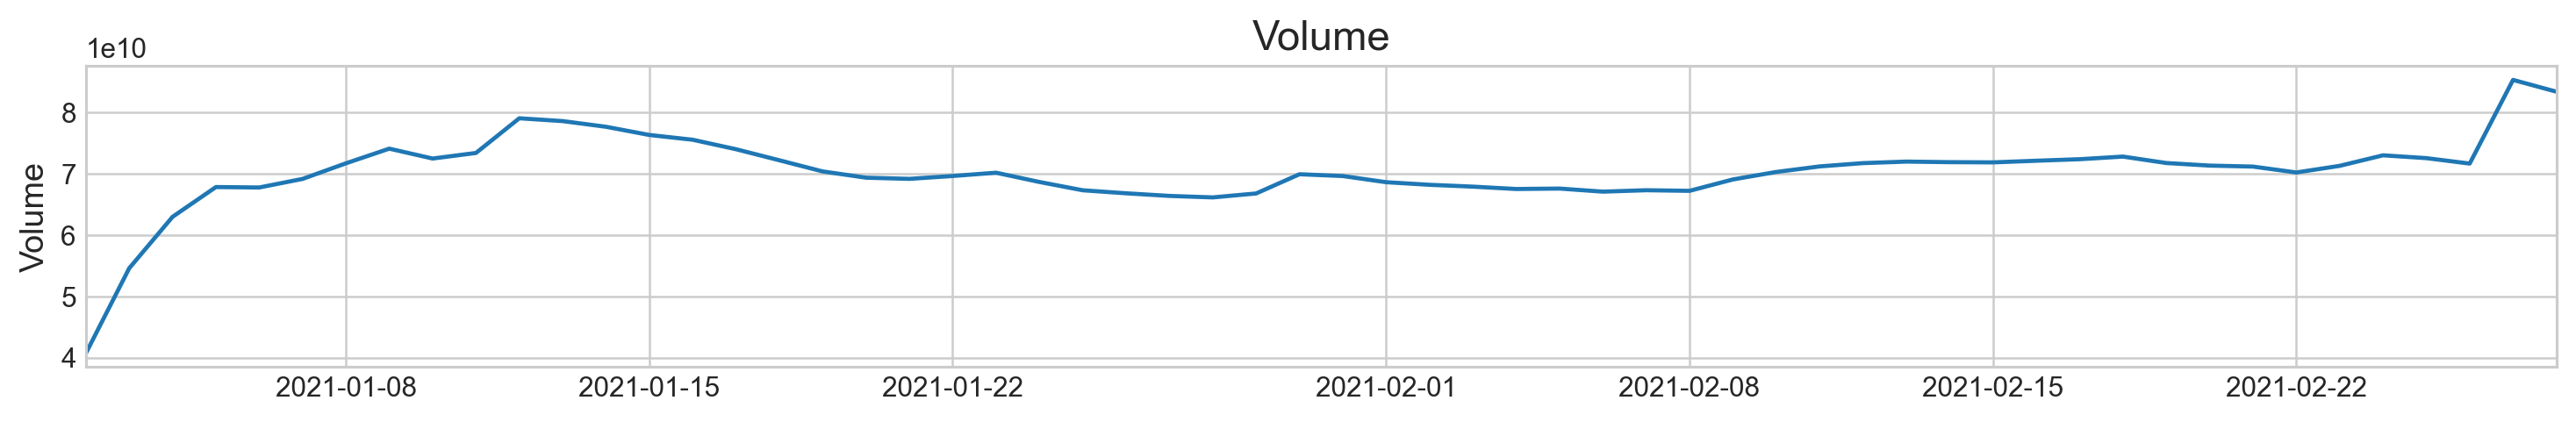

In [46]:
volume(bit_data.loc['2021-01':'2021-02'])

In [28]:
def macd(stock):
    # MACD
    plt.figure(figsize=(16,2))
    plt.plot(stock.MACD, label='MACD', color = '#b278ff')
    plt.plot(stock.Signal, label='Signal', color='#ffa74a')
    plt.axhline(0, color='#557692')
    plt.legend(frameon=True, loc=1, ncol=1, fontsize=10, borderpad=.6)
    plt.title('MACD', fontSize=15)
    plt.ylabel('Strength', fontSize=12)
    plt.show() 

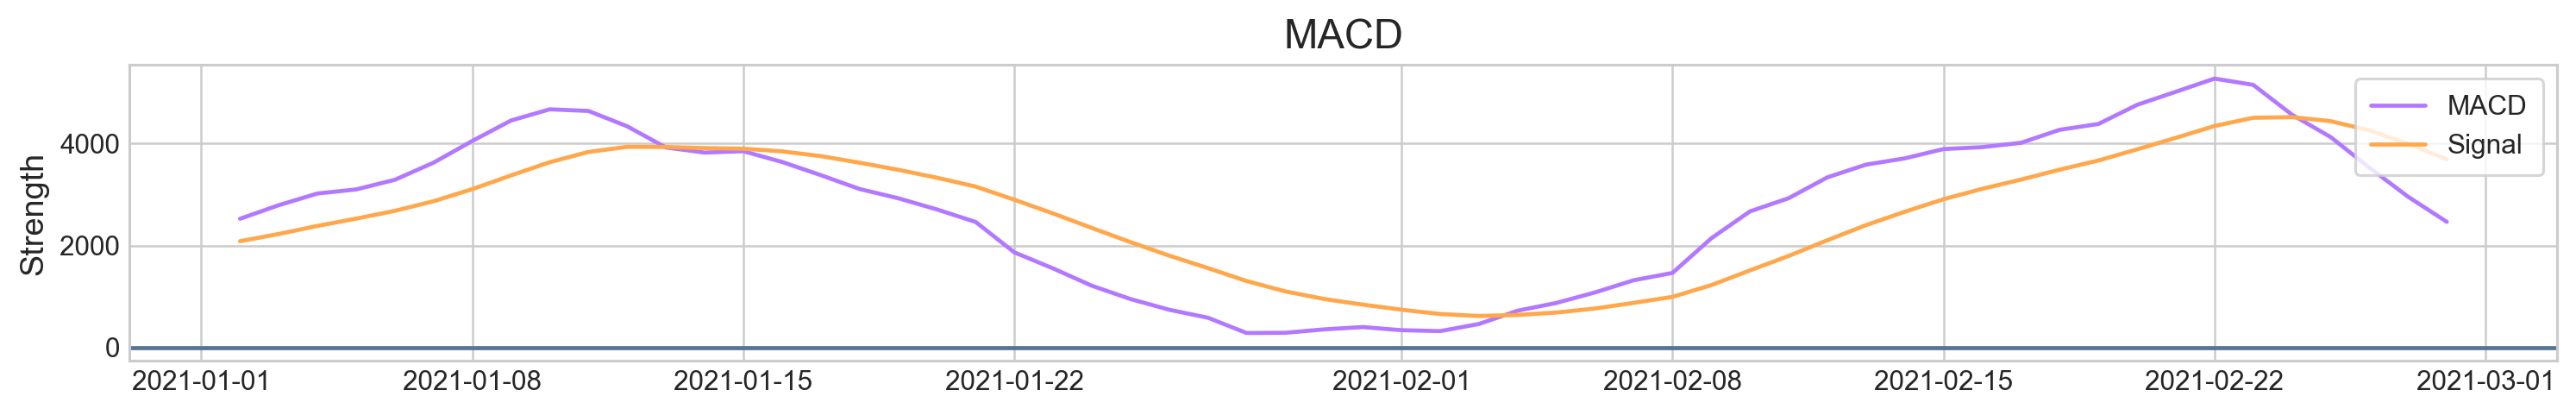

In [47]:
macd(bit_data.loc['2021-01':'2021-02'])

## Return by Month


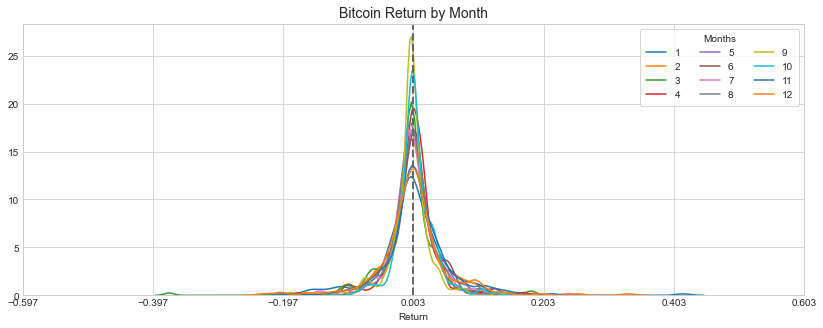

In [31]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-whitegrid')
for i in range(1,13):
    volatility = bit_data[bit_data.index.month==i].Return
    sns.distplot(volatility, hist=False, label=i)
    plt.legend(frameon=True, loc=1, ncol=3, fontsize=10, borderpad=.6, title='Months')
plt.axvline(bit_data.Return.mean(), color='#666666', ls='--', lw=2)
plt.xticks(plt.xticks()[0] + bit_data.Return.mean())
plt.title('Bitcoin Return by Month', fontSize=14)
plt.show()

## High-Low and Price

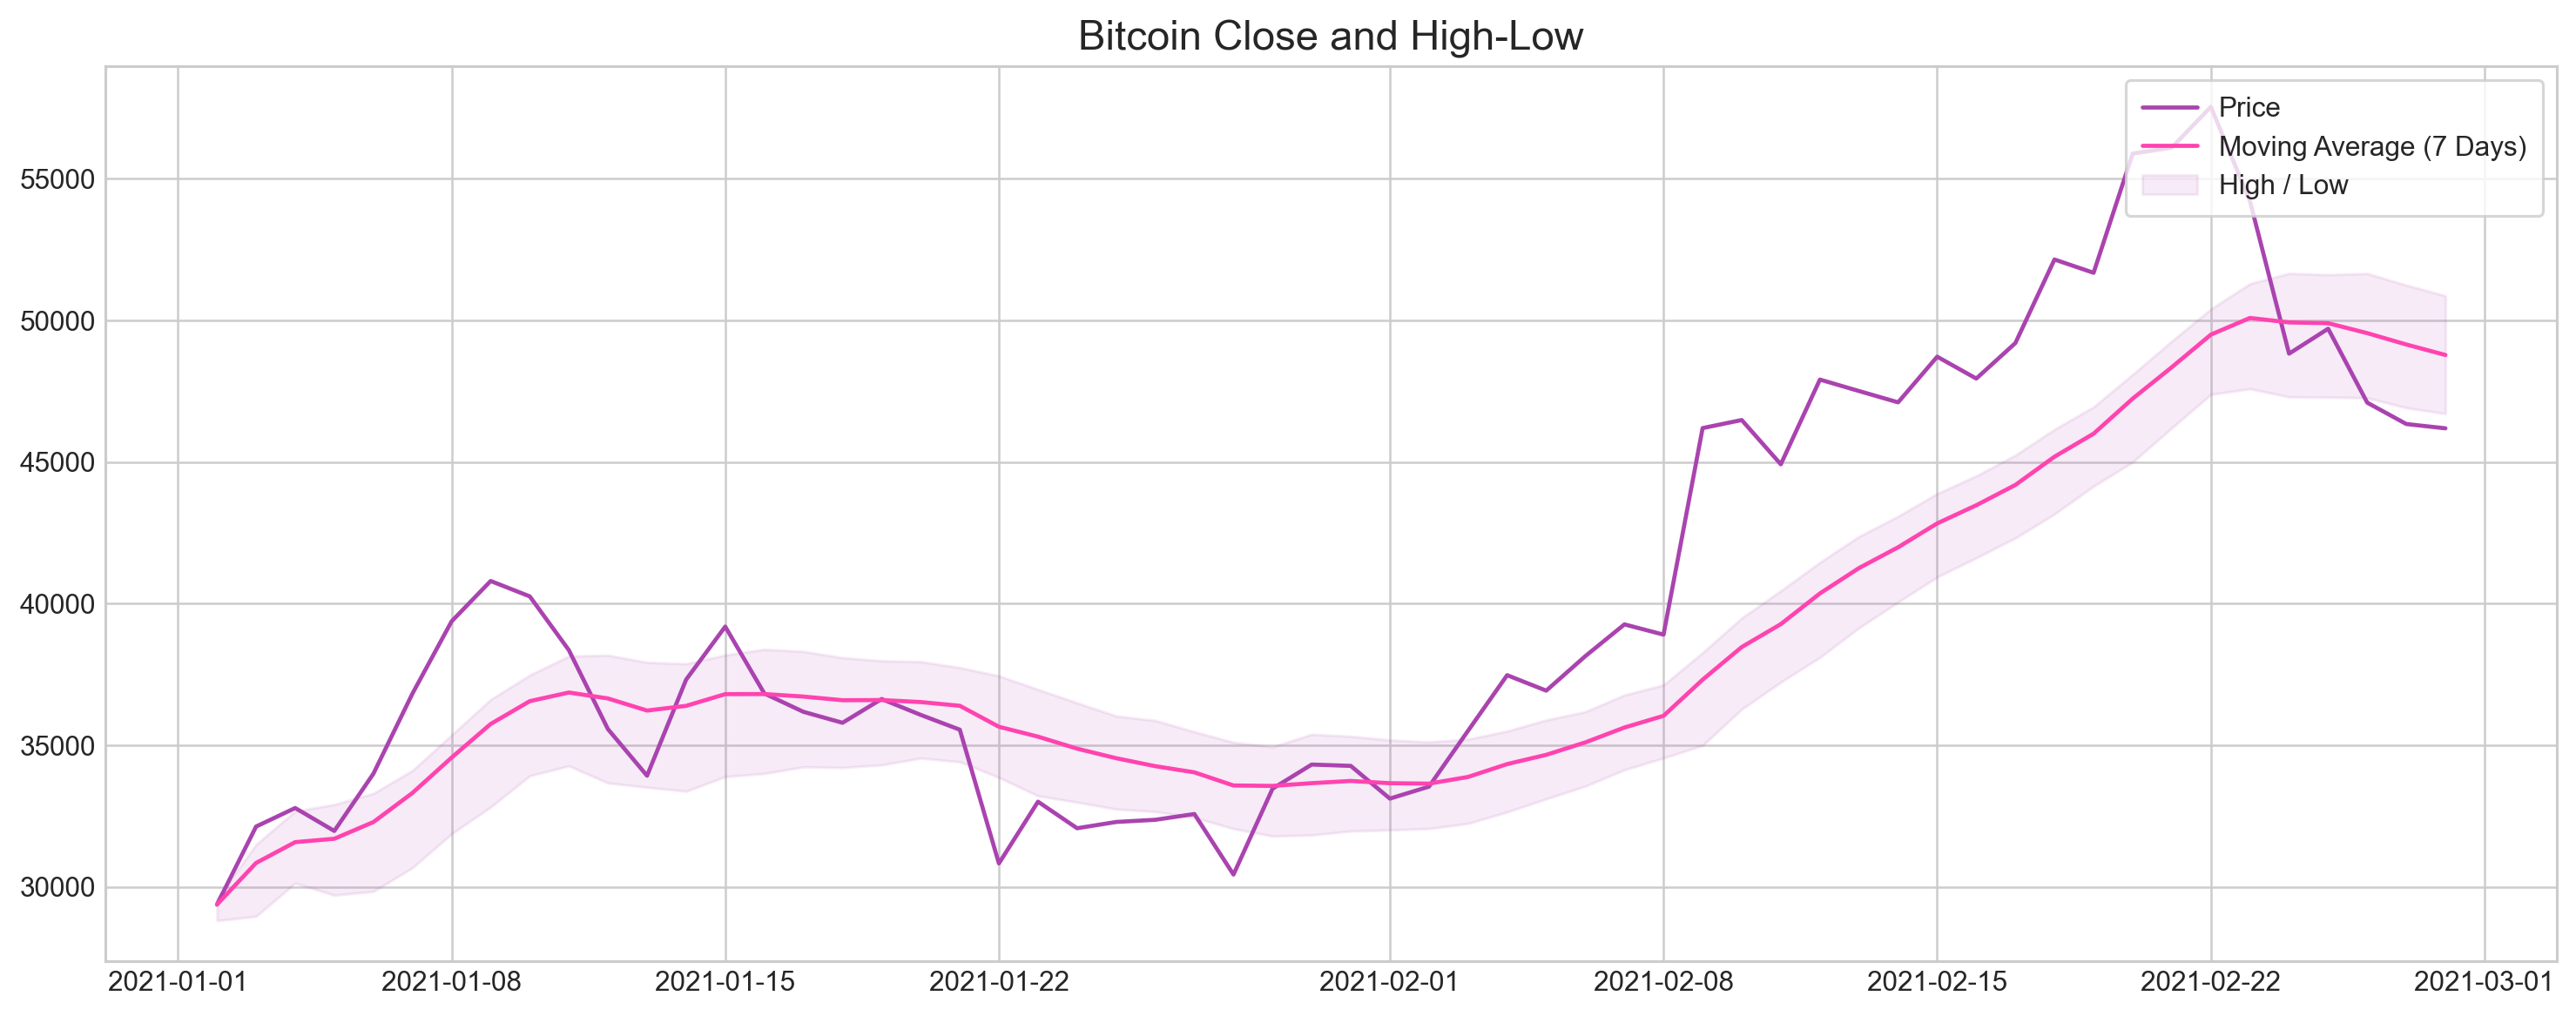

In [48]:
plt.figure(figsize=(16,6))

s = bit_data.loc['2021-01':'2021-02']
u = s.High.ewm(7).mean()
l = s.Low.ewm(7).mean()
plt.fill_between(s.index, u, l, color='#af43af', alpha=0.1, label='High / Low')
plt.plot(s.Close, color='#aa43af', label='Price')
plt.plot(s.Close.ewm(7).mean(), color='#ff43af', label='Moving Average (7 Days)')
plt.legend(frameon=True, loc=1, borderpad=.6)
plt.title('Bitcoin Close and High-Low', fontSize=15)
plt.show()

## Checking for Normality

Machine learning algorithms heavily rely on probability in learning process. Let's check target variable Return to normality.


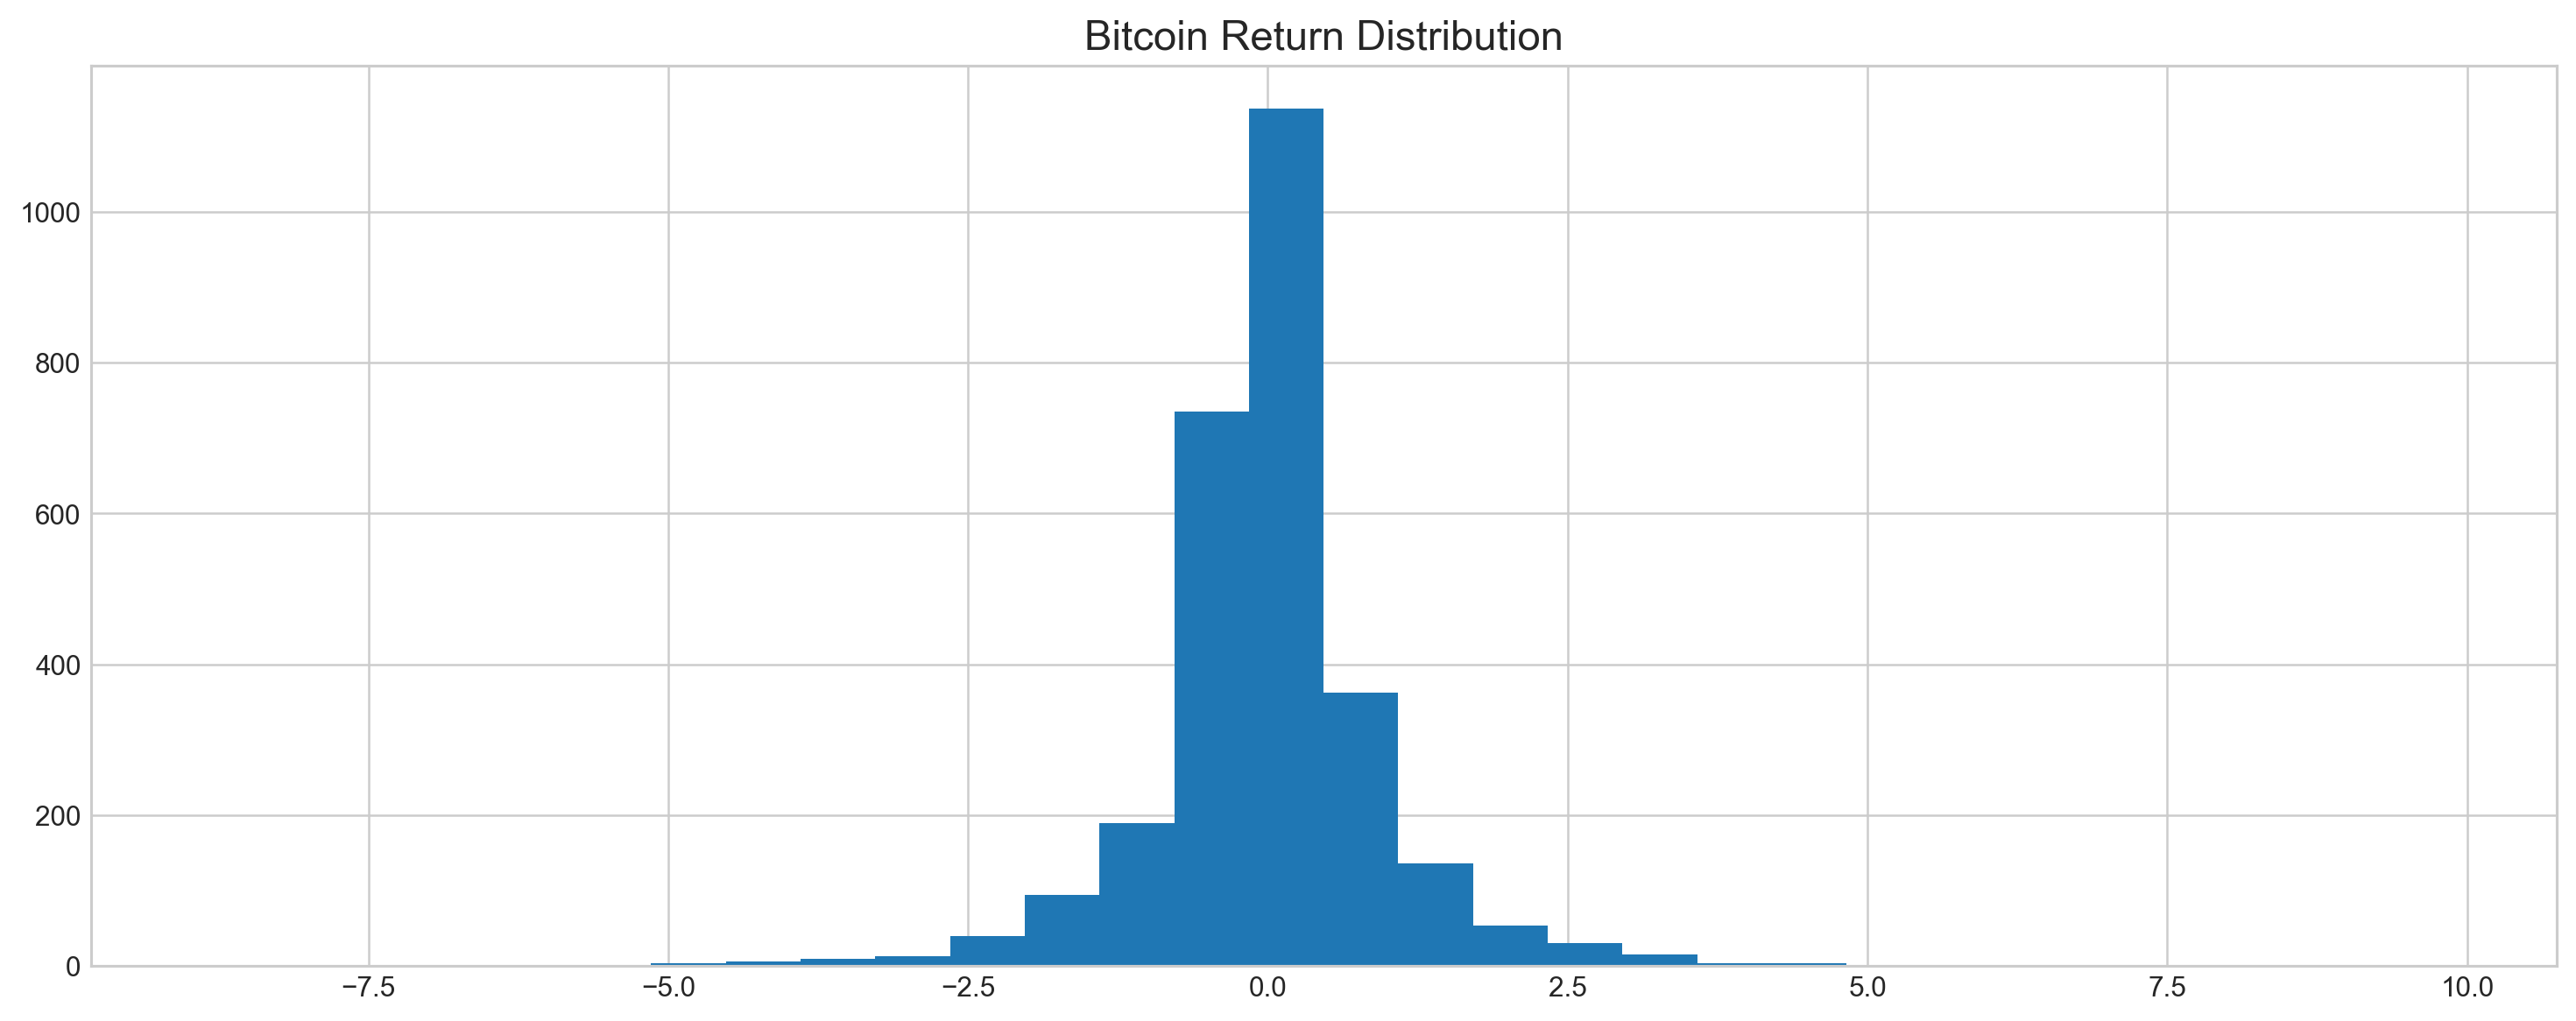

In [49]:
z = lambda x: (x - x.mean()) / x.std()

plt.hist(z(bit_data.Return), bins=30)
plt.title('Bitcoin Return Distribution', fontSize=15)
plt.show()

<Figure size 3632x1362 with 0 Axes>

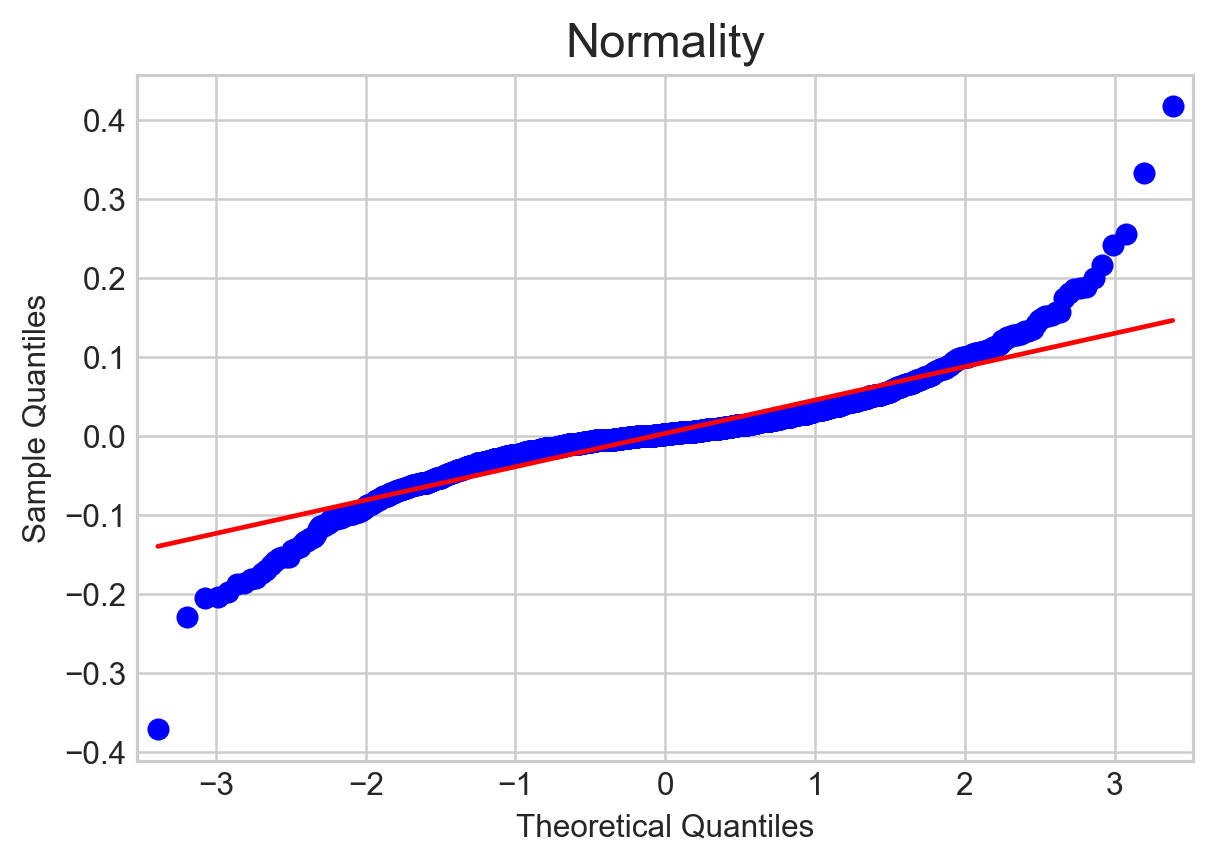

In [41]:
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
sm.qqplot(bit_data.Return, line='s', scale=1)
plt.rcParams['figure.figsize'] = [16.0, 6.0]
plt.title('Normality', fontSize=15)
plt.show()

## Conclusion

Return has 56% correlation with Change feature.

Close value mostly stays inside Bollinger Bands

Return feature mostly normal